<a href="https://colab.research.google.com/github/Sasikumar021/Data-Science/blob/main/Spamham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#SUPPORT VECTOR MACHINE - SUPPORT VECTOR classifier(Similar to LogisticRegression)

s =['Congrats you have own lottery and if you want the lottery money call the lottery number and get money',
    'Give your bank details for lottery money',
    'Lottery for sure if bank details are verified']

s

['Congrats you have own lottery and if you want the lottery money call the lottery number and get money',
 'Give your bank details for lottery money',
 'Lottery for sure if bank details are verified']

In [2]:
type(s)

list

In [3]:
#TOKENISATION - splitting up of data into different values called tokens
s[1].split()

['Give', 'your', 'bank', 'details', 'for', 'lottery', 'money']

In [4]:

#COUNT VECTORIZER - It tells us the importance of a word in a sentence in terms of frequency
from sklearn.feature_extraction.text import CountVectorizer
#Stop words are english words which do not add much meaning to a sentence (and,the,for,of,if,are)
vect = CountVectorizer(stop_words='english')#Text transformed into numbers
#The transformation is done in such a way ,that the meaning of the sentence is not sacrificed
op = vect.fit_transform(s).toarray()

In [5]:
op

array([[0, 1, 0, 3, 2, 1, 0, 0, 1],
       [1, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 1, 1, 0]])

In [6]:
import pandas as pd

df = pd.DataFrame(op, columns=vect.get_feature_names_out())

In [7]:
df

,bank,congrats,details,lottery,money,number,sure,verified,want
0,0,1,0,3,2,1,0,0,1
1,1,0,1,1,1,0,0,0,0
2,1,0,1,1,0,0,1,1,0


In [8]:
#support vector classifier (SVC model)
#Dataset - spam ham DATASET
#Dataser - https://raw.githubusercontent.com/diazoniclabs/Machine-Learning-using-sklearn/master/Datasets/spam.tsv

In [9]:
#Take the data and create dataframe
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/diazoniclabs/Machine-Learning-using-sklearn/master/Datasets/spam.tsv',sep = '\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [10]:
df.info

<bound method DataFrame.info of      label                                            message  length  punct
0      ham  Go until jurong point, crazy.. Available only ...     111      9
1      ham                      Ok lar... Joking wif u oni...      29      6
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
3      ham  U dun say so early hor... U c already then say...      49      6
4      ham  Nah I don't think he goes to usf, he lives aro...      61      2
...    ...                                                ...     ...    ...
5567  spam  This is the 2nd time we have tried 2 contact u...     160      8
5568   ham               Will ü b going to esplanade fr home?      36      1
5569   ham  Pity, * was in mood for that. So...any other s...      57      7
5570   ham  The guy did some bitching but I acted like i'd...     125      1
5571   ham                         Rofl. Its true to its name      26      1

[5572 rows x 4 columns]>

In [11]:
df.shape

(5572, 4)

In [12]:
df.size

22288

In [13]:
#Now i want to check the exact number of spam and ham messages
df['label'].value_counts()

,count
label,
ham,4825
spam,747


<Axes: xlabel='label'>

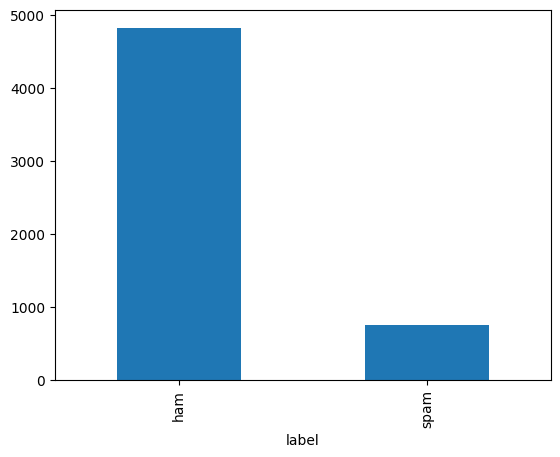

In [14]:
#3.Visualisation
df['label'].value_counts().plot(kind  = 'bar')

In [15]:
#4.Divide the data into input and output
#Input - Message
#Output - label
x = df.iloc[:,1].values #Only when the text messages are involved ,input is 1 dimensional
y = df.iloc[:,0].values
print (x)
print (y)

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']
['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [16]:
#5.Train and test variables
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [17]:

#6.Apply Tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_train_v = vect.fit_transform(x_train)
x_test_v = vect.transform(x_test)

In [20]:
#7.Apply a CLASSIFIER/REGRESSOR/CLUSTERER
from sklearn.svm import SVC
model = SVC()

In [21]:
#8.Model fitting
model.fit(x_train_v,y_train) #we are training the model here

SVC()

In [22]:
#9.Predict the output
y_pred = model.predict(x_test_v)
y_pred #Predicted output values

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [23]:
y_test #Actual output values

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [24]:
#10.Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

98.56424982053123

In [25]:
# Individual prediction/Evaluating a specific message
a = df['message'][10]

In [26]:
a

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [27]:
a = vect.transform([a])
model.predict(a)

array(['ham'], dtype=object)

In [28]:
b = df['message'][12]
b

'URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18'

In [29]:
b = vect.transform([b])
model.predict(b)

array(['spam'], dtype=object)

In [30]:
# Evaluate a custom message
c = 'win free tickets today'
c

'win free tickets today'

In [31]:
c = vect.transform([c])
model.predict(c)

array(['spam'], dtype=object)

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

text_model = make_pipeline(TfidfVectorizer(), SVC())

In [33]:
text_model.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [34]:
y_pred1 = text_model.predict(x_test)

In [35]:
y_pred1

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [36]:
y_test

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [37]:
accuracy_score(y_pred1,y_test)*100

98.56424982053123

In [38]:
d = 'win free tickets today'
d

'win free tickets today'

In [39]:
d = vect.transform([d])
model.predict(d)

array(['spam'], dtype=object)